In [22]:
#importing libraries to be used
import numpy as np
import pandas as pd
import math
import sklearn
import matplotlib.pyplot as plt

In [23]:
# reading the dataset for training the model
dataSet=pd.read_csv("../input_data/Robot1",delimiter=" ",header=None)

In [24]:
cols=[x for x in range(2,8)]+[1]
inputData=dataSet[cols]

In [25]:
inputData.columns=["a1","a2","a3","a4","a5","a6","label"]

In [26]:
trainingData=inputData.sample(frac=0.8)
validationData=inputData.drop(trainingData.index)

In [27]:
def euclidDistance(a,b):
    temp=0
    for key in b:
        if key is not 'label':
            temp+=((b[key]-a[key])**2)
    return math.sqrt(temp)

distances=[]

for vrow in validationData.to_dict('records'):
    temp=[]
    for trow in trainingData.to_dict('records'):
        temp.append([euclidDistance(vrow,trow),trow['label']])
    distances.append(sorted(temp))

In [28]:
def KNNPredict(k):
    predictions=[]
    for i in range(len(validationData)):
        ones=0
        for item in distances[i][:k]:
            ones+=item[1]
        zeros=k-ones
        if(ones>zeros):
            ans=1
        else:
            ans=0
        predictions.append(ans)

    truePositive,trueNegative,falsePositive,falseNegative=0,0,0,0
    labels=list(validationData['label'])
    for i in range(len(labels)):
        a=labels[i]
        b=predictions[i]
        if(a==b):
            if(a):
                truePositive+=1
            else:
                trueNegative+=1
        else:
            if(b):
                falsePositive+=1
            else:
                falseNegative+=1
    accuracy=(truePositive+trueNegative)/(len(validationData))
    return accuracy*100

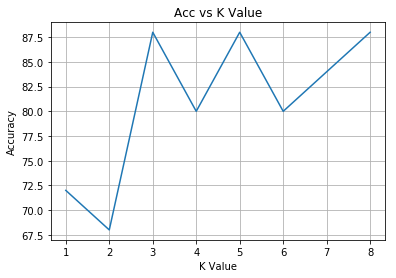

In [29]:
# for k in range(1,int(math.sqrt(len(trainingData))),2):
#     print("Accuracy on k: ",k,": ", KNNPredict(k),"%")

accuracies=[KNNPredict(k) for k in range(1,int(math.sqrt(len(trainingData))))]
plt.plot(range(1,int(math.sqrt(len(trainingData)))), accuracies)
plt.title('Acc vs K Value')
plt.xlabel('K Value')
plt.grid(True)
plt.ylabel('Accuracy')
plt.show()